# 7.2

In [24]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

%matplotlib inline

In [25]:
sample_size = 20
n = np.arange(1, sample_size + 1)

Сопряженным к распределению Бернулли является бета-распределение. Построим несколько графиков плотности бэта-распределения с различными параметрами.

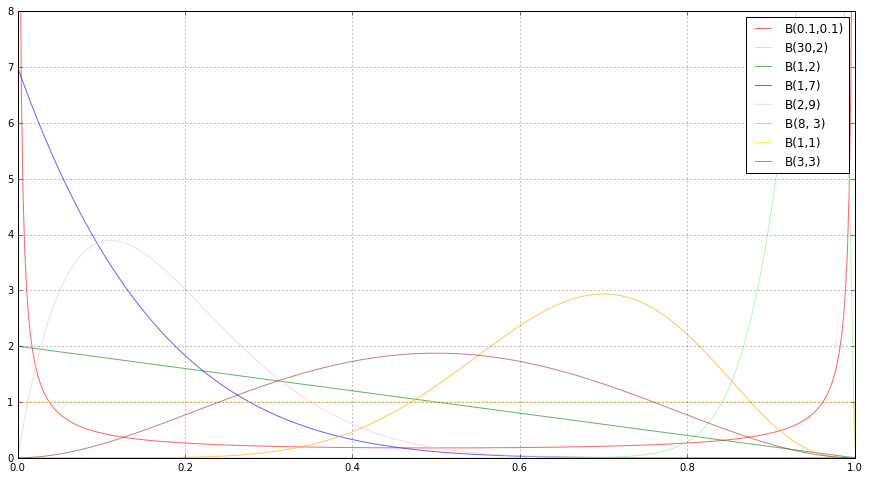

In [64]:
plt.figure(figsize=(15, 8))
x = np.linspace(-0.5, 1.5, 1000)
plt.plot(x, st.beta.pdf(x, 0.1, 0.1), color='red', alpha=0.6, label='B(0.1,0.1)')
plt.plot(x, st.beta.pdf(x, 30, 2), color='lightgreen', alpha=0.6, label='B(30,2)')
plt.plot(x, st.beta.pdf(x, 1, 2), color='green', alpha=0.6, label='B(1,2)')
plt.plot(x, st.beta.pdf(x, 1, 7), color='blue', alpha=0.6, label='B(1,7)')
plt.plot(x, st.beta.pdf(x, 2, 9), color='pink', alpha=0.6, label='B(2,9)')
plt.plot(x, st.beta.pdf(x, 8, 4), color='orange', alpha=0.6, label='B(8, 3)')
plt.plot(x, st.beta.pdf(x, 1, 1), color='gold', alpha=0.6, label='B(1,1)')
plt.plot(x, st.beta.pdf(x, 3, 3), color='brown', alpha=0.6, label='B(3,3)')
plt.legend()
plt.xlim((0, 1))  
plt.ylim((0, 8))  
plt.grid()
plt.show()

Из графика видно, что параментры $\alpha, \beta$ напрямую связаны с честностью монеты. При $\alpha = \beta$ монета честна, вероятность выпадения орла и решки одинаковы и равняются $0.5$. При $\alpha < \beta$ монета нечестна, перевес в сторону решки. При $\alpha > \beta$ - перевес в сторону орла. Причем, чем больше разница между параметрами, тем ближе график к 0 или 1.

In [39]:
def beta_est(alpha, beta, sample):
    alpha_1 = alpha + sample.cumsum()
    beta_1 = beta + n - sample.cumsum()
    return alpha_1 / (alpha_1 + beta_1)

In [65]:
def sample_func(p):
    sample = st.bernoulli.rvs(p, size = sample_size)
    OMP = sample.cumsum() / n

    plt.figure(figsize=(10, 5))
    plt.plot(n, abs(beta_est(1, 1, sample) - p), color='red', alpha=0.6, label='B(1,1)')
    plt.plot(n, abs(beta_est(1, 7, sample) - p), color='blue', alpha=0.6, label='B(1,7)')
    plt.plot(n, abs(beta_est(30, 2, sample) - p), color='orange', alpha=0.6, label='B(30,2)')
    plt.plot(n, abs(OMP - p), color='green', alpha=0.6, label='MLE')
    plt.legend()
    #plt.xlim((1, 100))  
    #plt.ylim((-40, 60))  
    plt.grid()
    plt.show()

$X_1, ..., X_{20}$ - выборка из распределения $Bernoulli(p)$. Возьмем за априорное распределение $B(\alpha, \beta)$ с различными парами параметров: (1,1), (1,5), (8,4). Построим графики $f(n) = |p_1 - p|$, где $p_1$  оценка $p$.

Оценка максимального правдоподобия: $p_1 = \overline{X}$

Байесовская оценка: $p_1 = \frac{\alpha_1}{\alpha_1 + \beta_1} = \frac{\alpha + \sum_{i = 1}^nx_i}{\alpha + \sum_{i = 1}^nx_i + \beta + n - \sum_{i = 1}^nx_i} = \frac{\alpha + \sum_{i = 1}^nx_i}{\alpha + \beta + n}$

p =  0.1


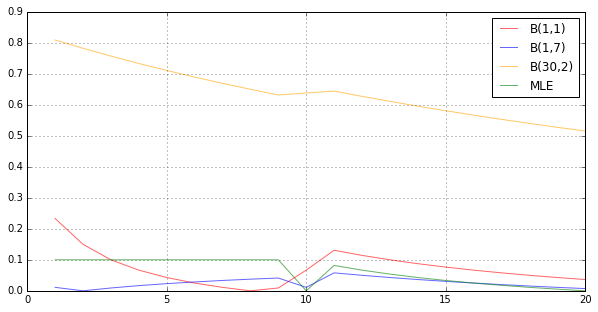

p =  0.3


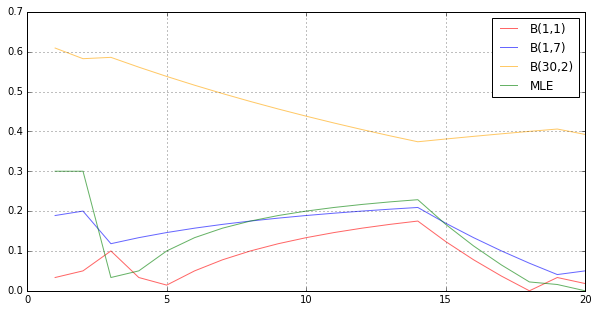

p =  0.5


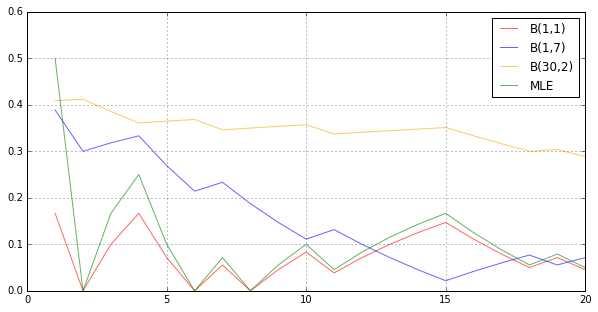

p =  0.7


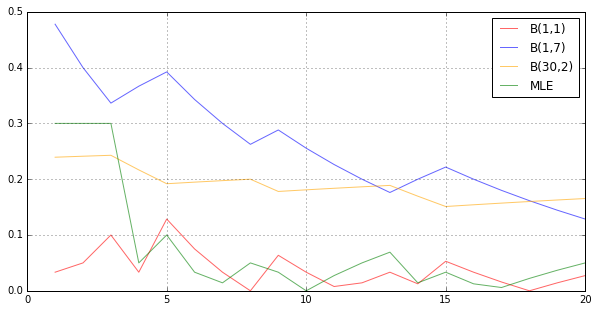

p =  0.9


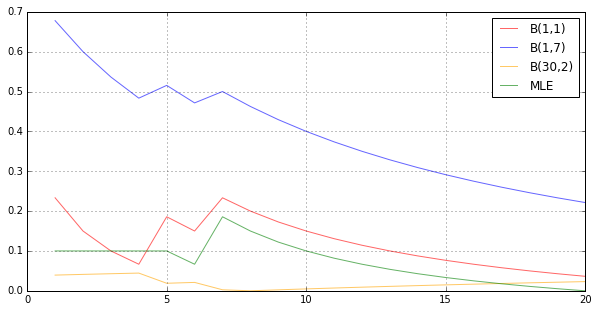

In [66]:
p = np.arange(0.1,1,0.2)
for _p in p:
    print("p = ", _p)
    sample_func(_p)

Из графиков видно, что теория о нечестности монеты работает: при параметрах бета-распределения, при которых перевес был в сторону орла (то есть наиболее вероятны значения p, близкие к 1), оценка становится точнее с приближение p к 1; при параметрах бета-распределением с перевесом в сторону решки оценка лучше при малых p. Оценка максимального правдоподобия примерно одинакова при любых $p$, как и оценка при $B(1,1)$. При $p = 0.5$, эти две оценки ведут себя одинаково.